In [14]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from data_provider.data_factory import Dataset_ETT_minute, Dataset_Custom
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [15]:
root_path = {}
data_path = {}

root_path['ili'] = './dataset/illness/'
data_path['ili'] = 'national_illness.csv'

root_path['ETTm2'] = './dataset/ETT-small/'
data_path['ETTm2'] = 'ETTm2.csv'

root_path['ECL'] = './dataset/electricity/'
data_path['ECL'] = 'electricity.csv'

root_path['Exchange'] = './dataset/exchange_rate/'
data_path['Exchange'] = 'exchange_rate.csv'

root_path['traffic'] = './dataset/traffic/'
data_path['traffic'] = 'traffic.csv'

root_path['weather'] = './dataset/weather/'
data_path['weather'] = 'weather.csv'

In [16]:

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:

# choose dataset!
dataset = 'ETTm2' #ili, Exchange, traffic etc
dataset = 'ili' #ili, Exchange, traffic etc
dataset = 'ili' #ili, Exchange, traffic etc


# select threshold for clustering, if cluster_crit is a float, it will be used as distance threshold
# else it will be used as number of clusters
cluster_crit = 0.5 


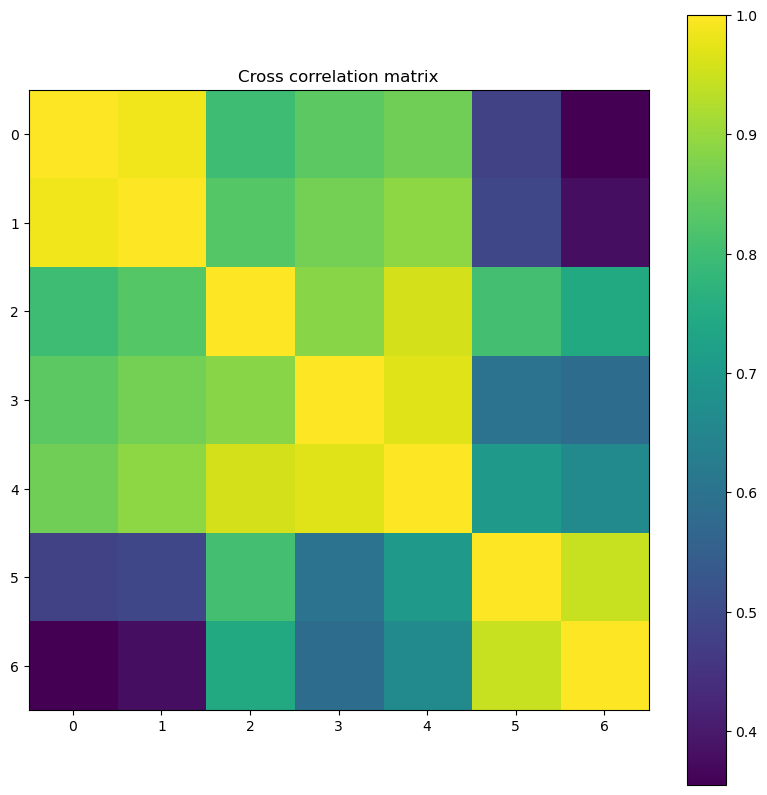

2
[0 0 0 0 0 1 1]


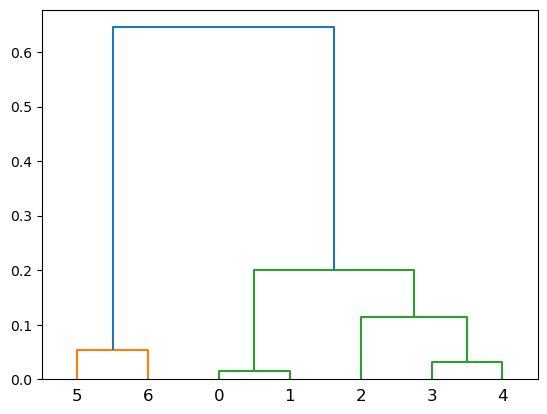

In [17]:

data = Dataset_Custom(root_path =root_path[dataset],
                      data_path = data_path[dataset],
                      flag = 'train',
                      features = 'M',
                      timeenc = 1)
data = data.data_x.T
size = data.shape[1]


# compute correlations
x = torch.tensor(data)
corr = np.corrcoef(x)

plt.figure(figsize=(10,10))
plt.imshow(corr)
plt.colorbar()
plt.title("Cross correlation matrix")
plt.show()


if cluster_crit%1!=0:
    distance_threshold = cluster_crit
    n_clusters = None
else:
    distance_threshold = None
    n_clusters = int(cluster_crit)


clustering = AgglomerativeClustering(compute_full_tree =True,
                                                            n_clusters=n_clusters,
                                                            distance_threshold = distance_threshold,
                                                            metric = 'precomputed',
                                                             linkage='complete',
                                                             compute_distances =True).fit(-corr+1)
d = plot_dendrogram(clustering, truncate_mode="level", p=3)

clustering_labels = clustering.labels_
print(len (np.unique(clustering_labels)))
print(clustering_labels)

